In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from asa.dataset import Dataset
from asa.plot_methods import plot_trend

In [3]:
x = np.random.normal(size=1000)
y = x**2 + np.random.normal(size=1000)
z = np.log(np.abs(x + y)) + np.random.normal(size=1000)

In [4]:
data = np.array([x, y, z]).T

In [5]:
dataset = Dataset(data, ['x', 'y', 'z'], ['x', 'y', 'z'])

(<Figure size 3200x1600 with 2 Axes>,
 array([<Axes: xlabel='x ', ylabel='y '>, <Axes: xlabel='x ', ylabel='z '>],
       dtype=object))

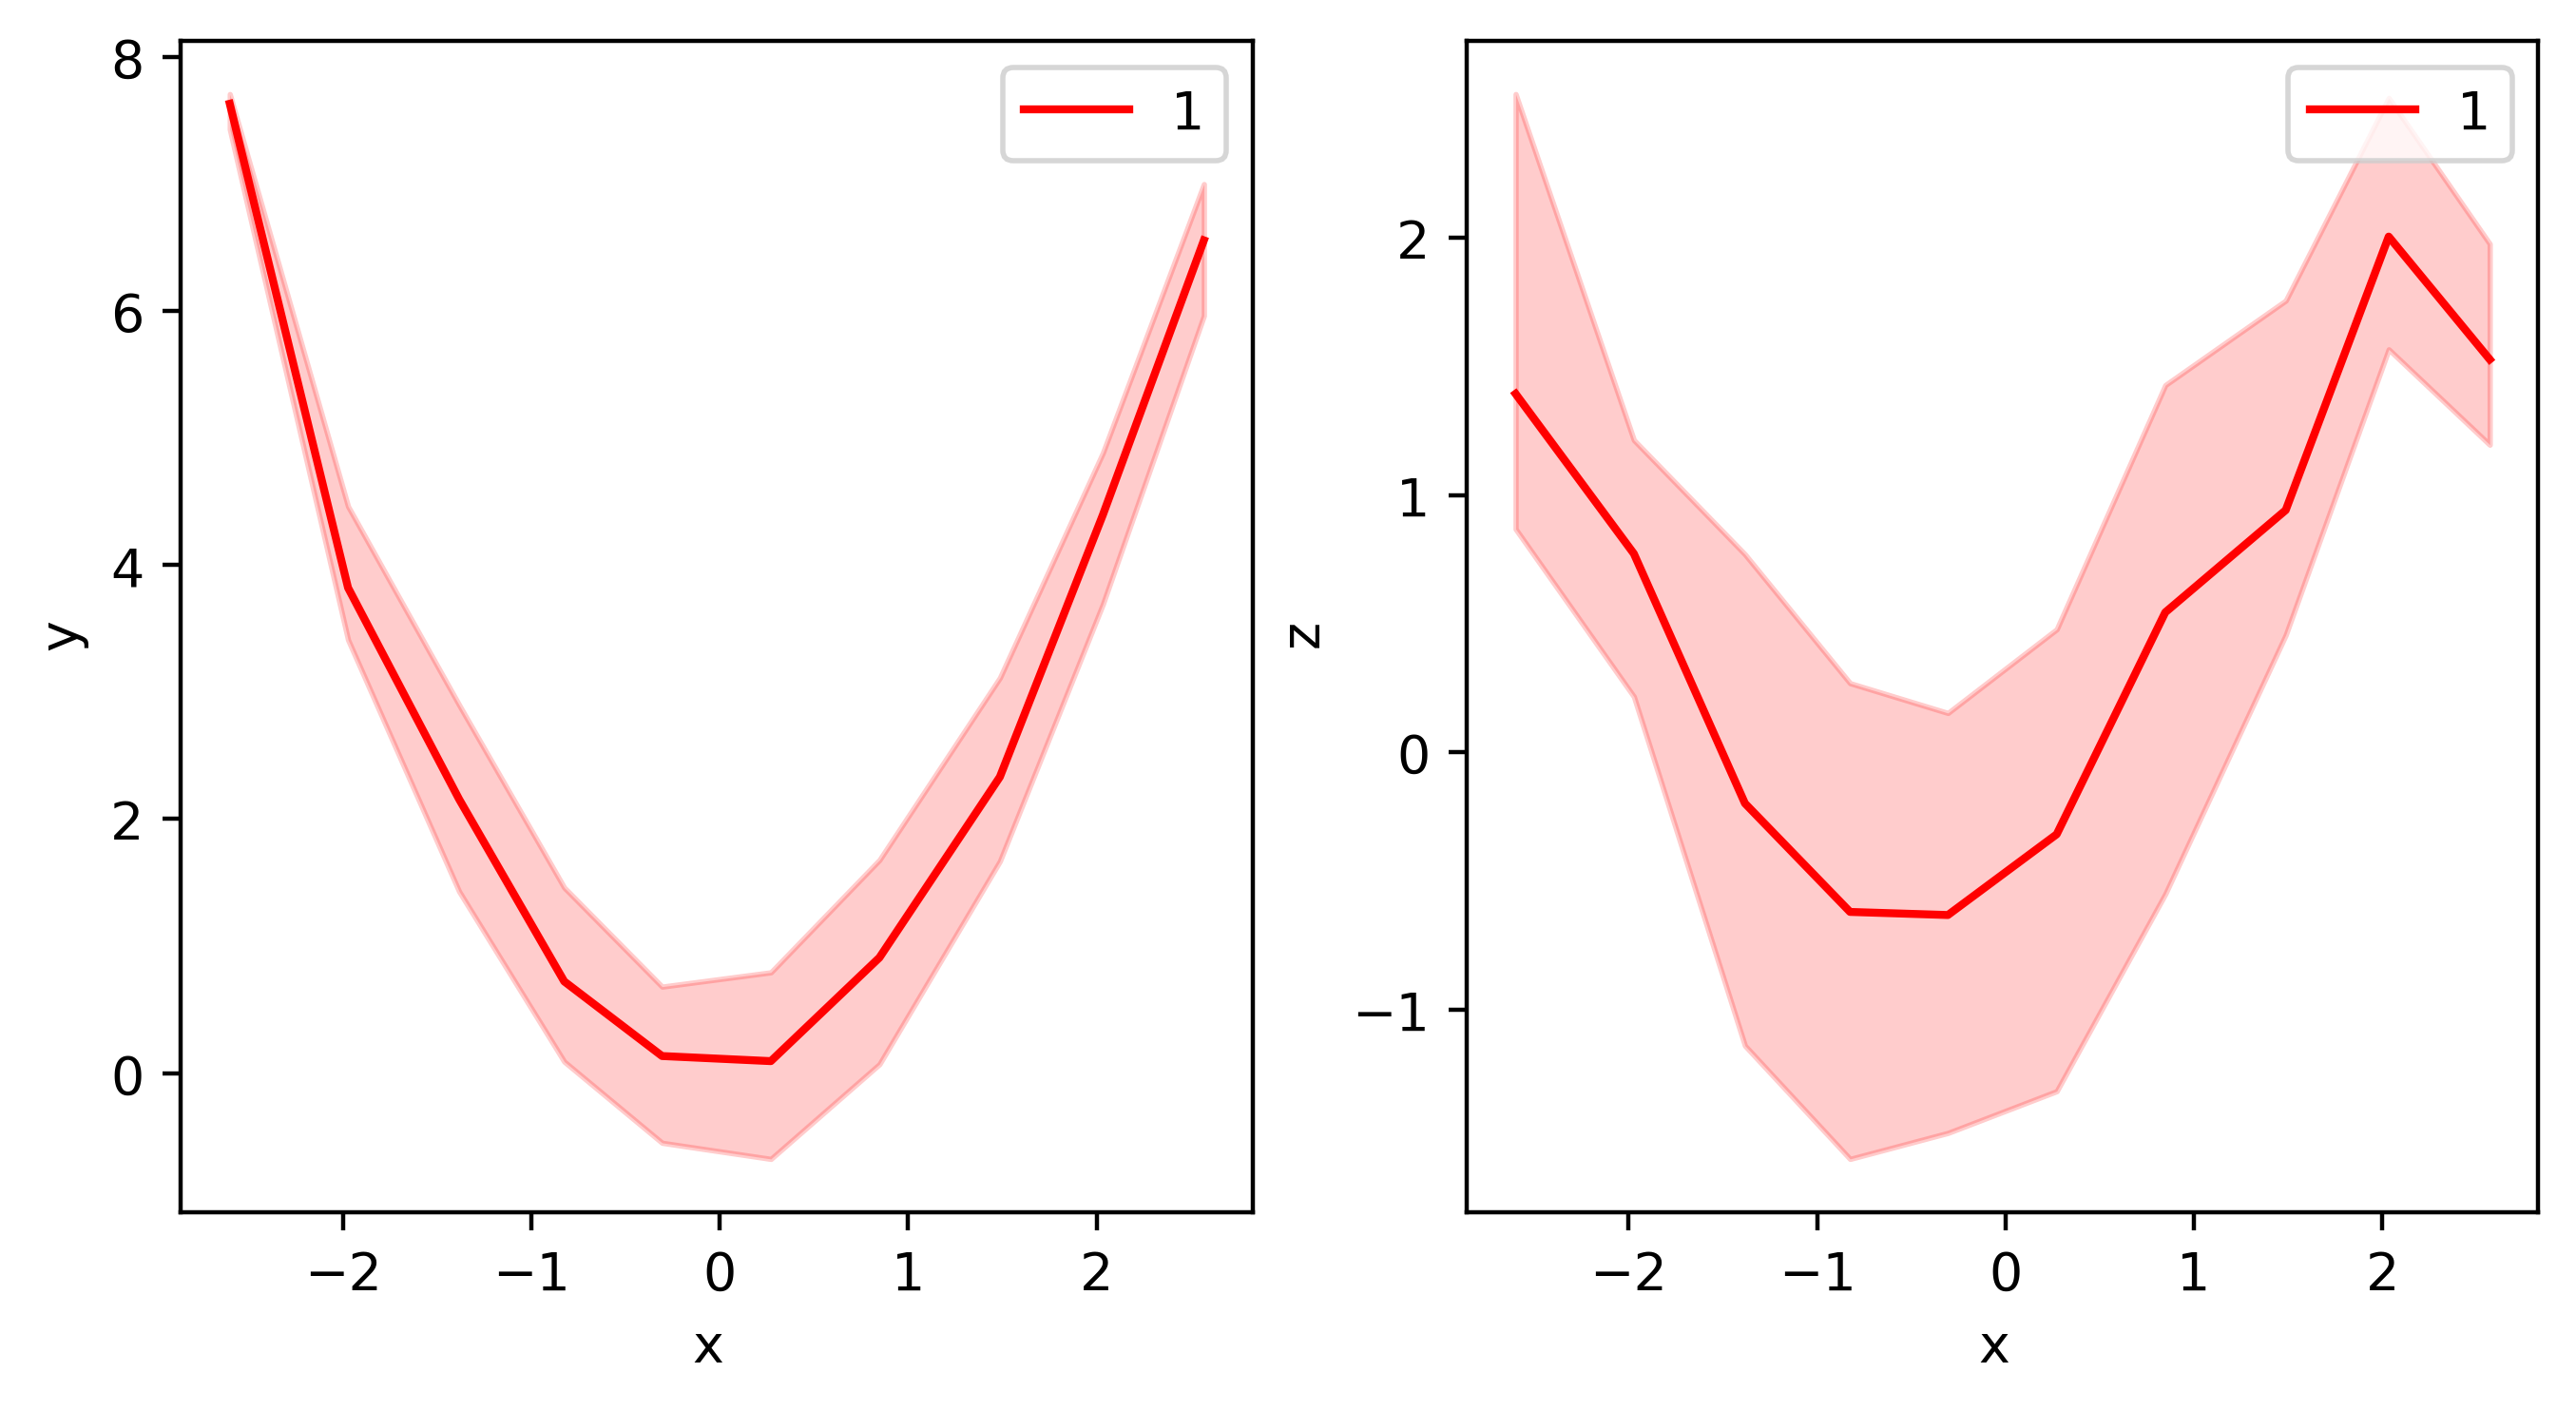

In [6]:
dataset.trend(
    'x',
    ['y', 'z'],
    range=([[-3, 3], [-10, 10]]),
    subplots_kwargs={'figshape': (1, 2)},
    bins=10,
    ytype='median',
    fkind='fbetween',
    plot_kwargs={
        "color": "r",
        #"ls": "--",
        "label": "1"
    },
)


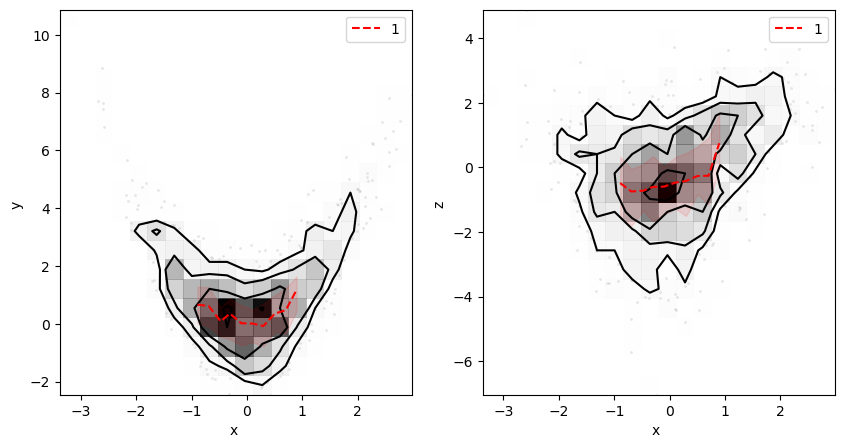

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
dataset.contour('x', ['y', 'z'], axes=axes)
dataset.trend('x', ['y', 'z'],
              range=([[-1, 1], [-10, 10]]),
              axes=axes,
              bins=10,
              ytype='median',
              plot_kwargs={
                  "color": "r",
                  "ls": "--",
                  "label": "1"
              },
              fkind='fbetween',
              fbetween_kwargs={
                  "color": "r",
                  "alpha": 0.1
              })
axes[0].legend(fontsize=10)


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='x ', ylabel='y '>, <Axes: xlabel='x ', ylabel='z '>],
       dtype=object))

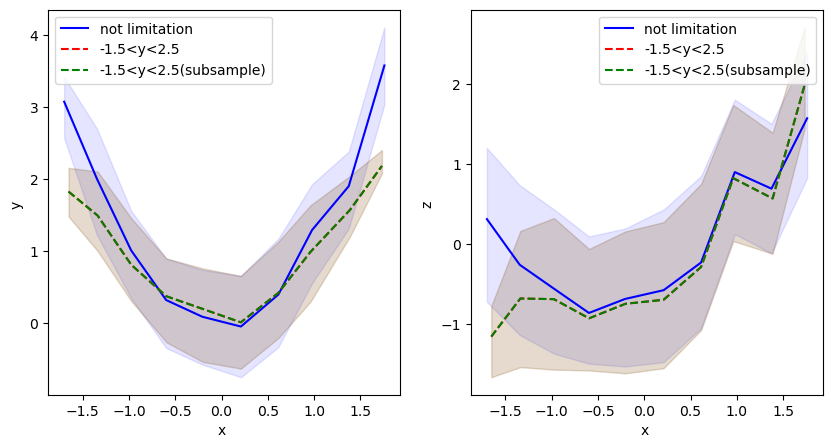

In [8]:
# properties
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

dataset.trend('x', ['y', 'z'],
              range=([[-2, 2], [-10, 10]]),
              axes=axes,
              bins=10,
              ytype='mean',
              plot_kwargs={
                  "color": "b",
                  "ls": "-",
                  "label": "not limitation"
              },
              **{
                  "uplim": 75,
                  "lowlim": 25,
                  "fkind": "fbetween",
                  "fbetween_kwargs": {
                      "color": "b",
                      "alpha": 0.1
                  }
              })

dataset.trend('x', ['y', 'z'],
              range=([[-2, 2], [-10, 10]]),
              axes=axes,
              bins=10,
              ytype='mean',
              plot_kwargs={
                  "color": "r",
                  "ls": "--",
                  "label": "-1.5<y<2.5"
              },
              prop_kwargs={
                  "props": y,
                  "pmin": -1.5,
                  "pmax": 2.5
              },
              **{
                  "uplim": 75,
                  "lowlim": 25,
                  "fkind": "fbetween",
                  "fbetween_kwargs": {
                      "color": "r",
                      "alpha": 0.1
                  }
              })

dataset.trend('x', ['y', 'z'],
              range=([[-2, 2], [-10, 10]]),
              axes=axes,
              bins=10,
              ytype='mean',
              plot_kwargs={
                  "color": "g",
                  "ls": "--",
                  "label": "-1.5<y<2.5(subsample)"
              },
              subsample=(dataset['y'] <= 2.5) & (dataset['y'] >= -1.5),
              **{
                  "uplim": 75,
                  "lowlim": 25,
                  "fkind": "fbetween",
                  "fbetween_kwargs": {
                      "color": "g",
                      "alpha": 0.1
                  }
              })


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='x ', ylabel='y '>, <Axes: xlabel='x ', ylabel='z '>],
       dtype=object))

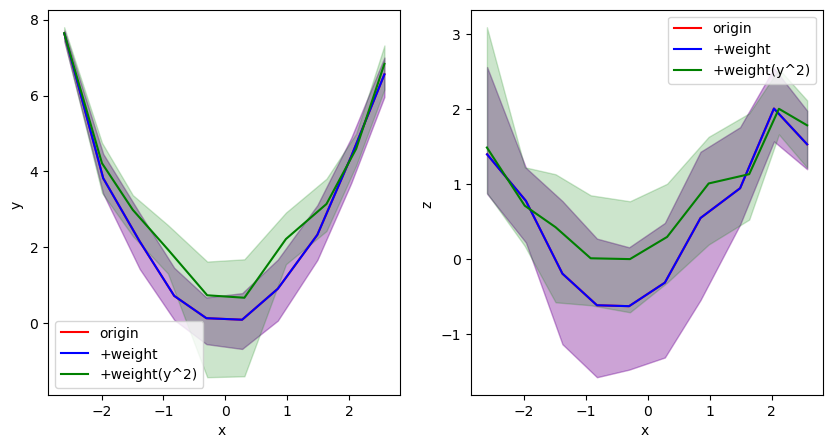

In [10]:
# weights
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

dataset.trend(
    'x',
    ['y', 'z'],
    range=([[-3, 3], [-10, 10]]),
    axes=axes,
    bins=10,
    ytype='median',
    plot_kwargs={
        "color": "r",
        #"ls": "--",
        "label": "origin"
    },
    fkind='fbetween')

dataset.trend(
    'x',
    ['y', 'z'],
    range=([[-3, 3], [-10, 10]]),
    axes=axes,
    bins=10,
    ytype='median',
    weights=np.ones(len(x)),
    plot_kwargs={
        "color": "b",
        #"ls": "--",
        "label": "+weight"
    },
    fkind='fbetween')

dataset.trend(
    'x',
    ['y', 'z'],
    range=([[-3, 3], [-10, 10]]),
    axes=axes,
    bins=10,
    ytype='median',
    weights=y**2,
    plot_kwargs={
        "color": "g",
        #"ls": "--",
        "label": "+weight(y^2)"
    },
    fkind='fbetween')


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='x ', ylabel='y '>, <Axes: xlabel='x ', ylabel='z '>],
       dtype=object))

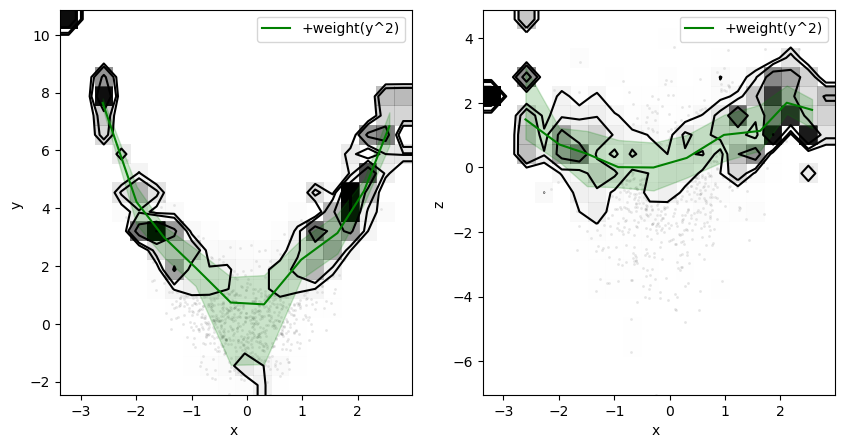

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
dataset.contour('x', ['y', 'z'], axes=axes, weights=y**2)

dataset.trend(
    'x',
    ['y', 'z'],
    range=([[-3, 3], [-10, 10]]),
    axes=axes,
    bins=10,
    ytype='median',
    weights=y**2,
    plot_kwargs={
        "color": "g",
        #"ls": "--",
        "label": "+weight(y^2)"
    },
    fkind='fbetween')

## Test plot_trend

In [12]:
x = np.random.normal(size=1000)
y = x**2 + np.random.normal(size=1000)

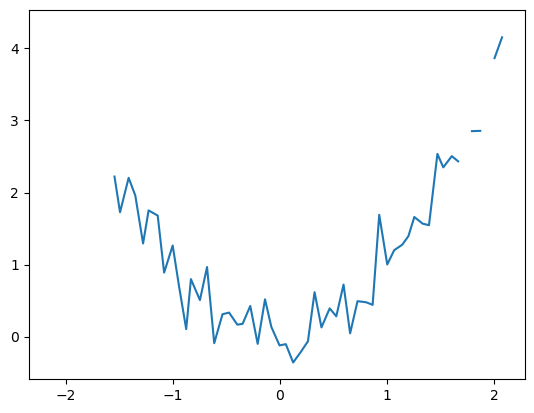

In [13]:
plot_trend(x, y, bins=100, ytype='median', N_min=5)